# TWITTER SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/vineetdhanawat/twitter-sentiment-analysis/master/datasets/Sentiment%20Analysis%20Dataset.csv',encoding='latin-1')

In [3]:
data.head()


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
print(data.shape)
print(data.info())
print(data.dtypes)

(1048575, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ItemID         1048575 non-null  int64 
 1   Sentiment      1048575 non-null  int64 
 2   SentimentText  1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None
ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object


In [57]:
#we will take 1/4 of dataset because it's huge dataset mylaptop can't run it that's why i am taking 1/4 of the total 

In [5]:
df=data.loc[0:262140,:]

In [6]:
print(df.shape)

(262141, 3)


In [7]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [8]:
print(df['Sentiment'].unique())

[0 1]


# Cleaning Punctuations

In [ ]:
#cleaning punctuations basically means that we are removing some unwanted elements
#from the comments like @Username will convert to only name
#deleting numerical value 

In [9]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['SentimentText']= df['SentimentText'].apply(lambda x: cleaning_punctuations(x))

In [10]:
df['tweet']=df['SentimentText'].str.replace("[^a-zA-Z#]"," ")

In [11]:
df['tweet']=df['tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))

In [12]:
df.head()

,ItemID,Sentiment,SentimentText,tweet
0,1,0,is so sad for my APL friend,friend
1,2,0,I missed the New Moon trailer,missed Moon trailer
2,3,1,omg its already 730 O,already
3,4,0,Omgaga Im sooo im gunna CRy Ive be...,Omgaga sooo gunna been this dentist since supo...
4,5,0,i think mi bf is cheating on me TT,think cheating


# Tokenization

In [13]:
tokenized_tweet=df['tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                                             [friend]
1                              [missed, Moon, trailer]
2                                            [already]
3    [Omgaga, sooo, gunna, been, this, dentist, sin...
4                                    [think, cheating]
Name: tweet, dtype: object

# Stemming

In [15]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[ps.stem(word)for word in x])
tokenized_tweet.head()

0                                             [friend]
1                                [miss, moon, trailer]
2                                            [alreadi]
3    [omgaga, sooo, gunna, been, thi, dentist, sinc...
4                                       [think, cheat]
Name: tweet, dtype: object

# Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[wl.lemmatize(word)for word in x])
tokenized_tweet.head()

0                                             [friend]
1                                [miss, moon, trailer]
2                                            [alreadi]
3    [omgaga, sooo, gunna, been, thi, dentist, sinc...
4                                       [think, cheat]
Name: tweet, dtype: object

In [17]:
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i]= "  ".join(tokenized_tweet[i])
    
df['tweet']=tokenized_tweet
df.head()

,ItemID,Sentiment,SentimentText,tweet
0,1,0,is so sad for my APL friend,friend
1,2,0,I missed the New Moon trailer,miss moon trailer
2,3,1,omg its already 730 O,alreadi
3,4,0,Omgaga Im sooo im gunna CRy Ive be...,omgaga sooo gunna been thi dentist sinc ...
4,5,0,i think mi bf is cheating on me TT,think cheat


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

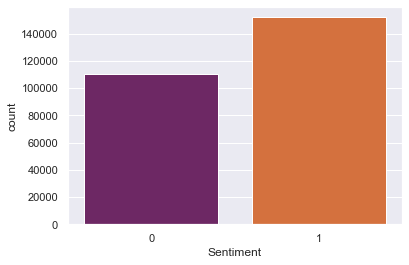

In [18]:
sn.set_theme(style="darkgrid")
sn.countplot(df['Sentiment'],data=df,palette='inferno')

In [54]:
Negative=df[df['Sentiment']==0]
Negative.head()

,ItemID,Sentiment,SentimentText,tweet
0,1,0,is so sad for my APL friend,friend
1,2,0,I missed the New Moon trailer,miss moon trailer
3,4,0,Omgaga Im sooo im gunna CRy Ive be...,omgaga sooo gunna been thi dentist sinc ...
4,5,0,i think mi bf is cheating on me TT,think cheat
5,6,0,or i just worry too much,just worri much


In [56]:
Positive=df[df['Sentiment']==1]
Positive.head()

,ItemID,Sentiment,SentimentText,tweet
2,3,1,omg its already 730 O,alreadi
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin,juuuuuuuuuuuuuuuuussssst chillin
8,9,1,handed in my uniform today i miss you a...,hand uniform today miss alreadi
9,10,1,hmmmm i wonder how she my number,hmmmm wonder number
11,12,1,thanks to all the haters up in my face a...,thank hater face


# Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
vectorizer=vectorizer.fit_transform(df['tweet'])

# BUILDING MODEL

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(vectorizer,df['Sentiment'],test_size=0.5,random_state=50)

In [23]:
x_train

<131070x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 456705 stored elements in Compressed Sparse Row format>

# MODEL 1

In [24]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression(C =1, max_iter = 10000)
model.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=10000)

In [45]:
pred=model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_test,pred)
print(matrix)
score=accuracy_score(y_test,pred)
print('accuracy score is',score)
report=classification_report(y_test,pred)
print(report)

[[30576 24305]
 [11986 64204]]
accuracy score is 0.7231195306360675
              precision    recall  f1-score   support

           0       0.72      0.56      0.63     54881
           1       0.73      0.84      0.78     76190

    accuracy                           0.72    131071
   macro avg       0.72      0.70      0.70    131071
weighted avg       0.72      0.72      0.72    131071



<AxesSubplot:>

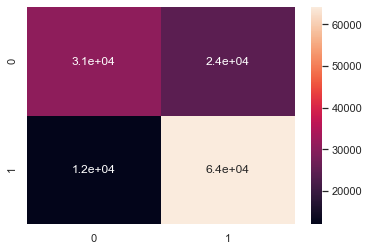

In [47]:
sn.heatmap(matrix,annot=True)

# MODEL 2

In [29]:
from sklearn.naive_bayes import BernoulliNB

In [35]:
model2 = BernoulliNB()
model2.fit(x_train, y_train)
pred1 = model2.predict(x_test)

In [50]:
cm=confusion_matrix(y_test,pred1)
print(cm)
score1=accuracy_score(y_test,pred1)
print('accuracy score is ',score1)
report1=classification_report(y_test,pred1)
print(report1)

[[32176 22705]
 [13778 62412]]
accuracy score is  0.7216546757101113
              precision    recall  f1-score   support

           0       0.70      0.59      0.64     54881
           1       0.73      0.82      0.77     76190

    accuracy                           0.72    131071
   macro avg       0.72      0.70      0.71    131071
weighted avg       0.72      0.72      0.72    131071



<AxesSubplot:>

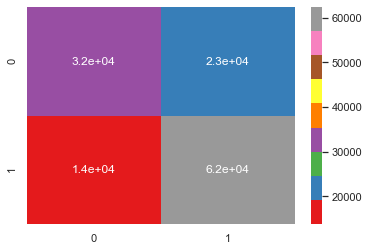

In [43]:
sn.heatmap(cm,annot=True,cmap='Set1')